# Telco Customer Churn

Welcome to my mini-project analysing the Telco Customer Churn dataset from the Kaggle website.

This notebook is a work in progress and will be updated periodically.

In [1]:
#Import required libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
#Read csv file into dataframe and display head
customer_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
#Display dataframe characteristics
print('Rows: ', customer_data.shape[0])
print('Columns: ', customer_data.shape[1])

df_info = pd.DataFrame({'Null values': customer_data.isnull().sum().values, 
                        'Unique values': customer_data.nunique(), 
                        'Data type': customer_data.dtypes})
df_info.columns.names = ['Feature']
print('\n', df_info)

Rows:  7043
Columns:  21

 Feature          Data type  Null values  Unique values
customerID          object            0           7043
gender              object            0              2
SeniorCitizen        int64            0              2
Partner             object            0              2
Dependents          object            0              2
tenure               int64            0             73
PhoneService        object            0              2
MultipleLines       object            0              3
InternetService     object            0              3
OnlineSecurity      object            0              3
OnlineBackup        object            0              3
DeviceProtection    object            0              3
TechSupport         object            0              3
StreamingTV         object            0              3
StreamingMovies     object            0              3
Contract            object            0              3
PaperlessBilling    object            

In [4]:
#Convert 'TotalCharges' column values to float and check for nulls again
customer_data['TotalCharges'] = pd.to_numeric(customer_data['TotalCharges'], errors= 'coerce')

df_info = pd.DataFrame({'Null values': customer_data.isnull().sum().values,
                        'Data type': customer_data.dtypes})
df_info.columns.names = ['Feature']
print('\n', df_info)


 Feature          Data type  Null values
customerID          object            0
gender              object            0
SeniorCitizen        int64            0
Partner             object            0
Dependents          object            0
tenure               int64            0
PhoneService        object            0
MultipleLines       object            0
InternetService     object            0
OnlineSecurity      object            0
OnlineBackup        object            0
DeviceProtection    object            0
TechSupport         object            0
StreamingTV         object            0
StreamingMovies     object            0
Contract            object            0
PaperlessBilling    object            0
PaymentMethod       object            0
MonthlyCharges     float64            0
TotalCharges       float64           11
Churn               object            0


There was an error when trying to convert TotalCharges to a float. Some further investigation revealed that there are actually some null values that were missed due to the cells containing a blank " " rather than NaN. By using Pandas to_numeric method, I have been able to work around the issue and convert the empty cells to NaN.

We see now there are 11 null values in the TotalCharges column. We'll need to handle these so let's have a closer look at the rows in question.

In [5]:
#Display rows with null values in 'TotalCharges' column
customer_data[customer_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


One idea I had was to assess how the MonthlyCharges column looks vs TotalCharges to fill in the NaN values. In theory you would assume most values would be close to tenure x MonthlyCharges, allowing for customers who may have had Contract changes over time.

That's when I noticed why TotalCharges had null values for these 11 customers. They all had a tenure of 0, meaning they are new customers that most likely had not been billed yet for their first month of the contract. With this knowledge, we'll change the TotalCharges values to 0.0, so that they are in a float format like the rest of the column.

These rows only account for 0.16% of customers, so we could have just dropped them for ease. However, in a much larger dataset or a scenario where there might be a lot of new customers, you would not want to just drop them from the data as there may be some issue during the onboarding phase that is causing customers to leave.

In [6]:
#Change NaN values to 0
customer_data[customer_data['TotalCharges'].isnull() == True] = \
    customer_data[customer_data['TotalCharges'].isnull() == True].replace(np.nan, 0.0)

In [102]:
customer_data_bin = customer_data.iloc[:, 1:].copy()

customer_data_bin['Churn'].replace('Yes', 1, inplace= True)
customer_data_bin['Churn'].replace('No', 0, inplace= True)

customer_data_bin['SeniorCitizen'].replace(1, 'Yes', inplace= True)
customer_data_bin['SeniorCitizen'].replace(0, 'No', inplace= True)

le = preprocessing.LabelEncoder()

def transform_label(series):
    
    if series.dtype == 'object':
        series = le.fit_transform(series)
    
    return series

customer_data_trans = customer_data_bin.copy().apply(lambda x: transform_label(x))
customer_data_trans

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


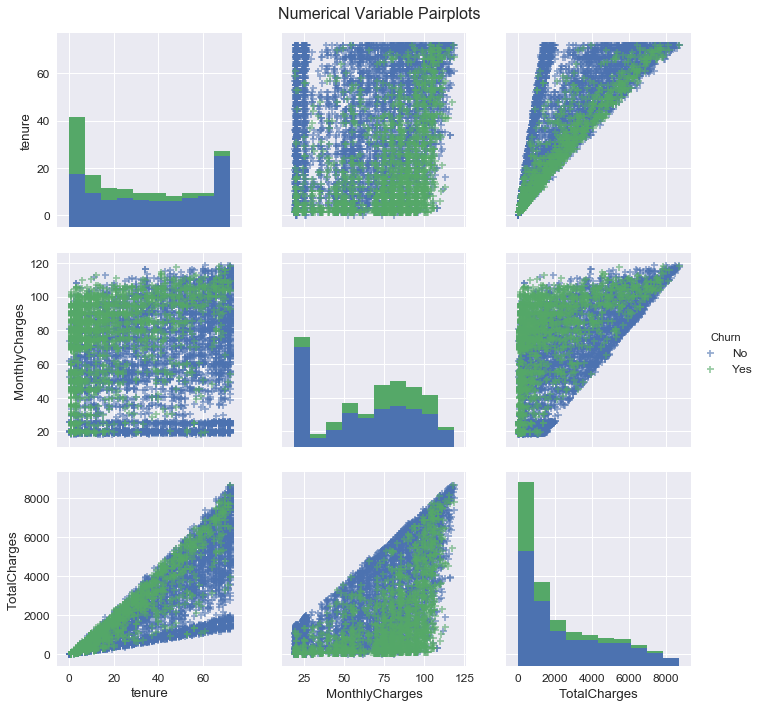

In [103]:
#Plot numerical variables and visualise churn values
sns.set(font_scale= 1.2)
g = sns.pairplot(customer_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']],
                 hue= 'Churn', markers= '+', plot_kws = {'alpha': 0.6}, size= 3.25);
g.fig.suptitle('Numerical Variable Pairplots', size= 16, y= 1.01);

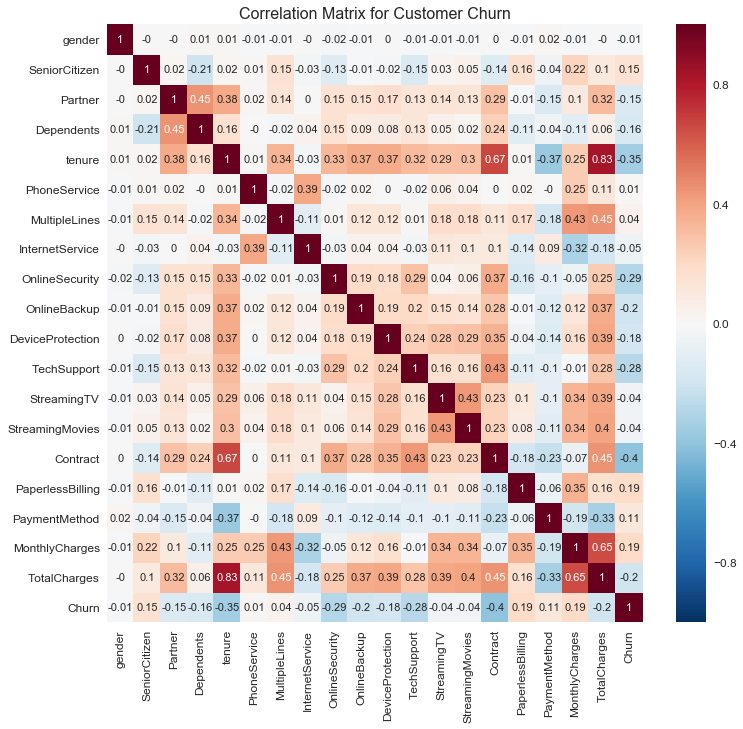

In [104]:
#Plot correlations on heatmap
plt.figure(figsize= (12, 11))
plt.title('Correlation Matrix for Customer Churn', size= 16)
sns.heatmap(round(customer_data_trans.corr(), 2), annot= True, annot_kws= {'size': 11});

Largest absolute correlation coefficients for churn appear to be tenure and Contract on the negative side and SeniorCitizen, PaperlessBilling and MonthlyCharges on positive side, although not very strong.

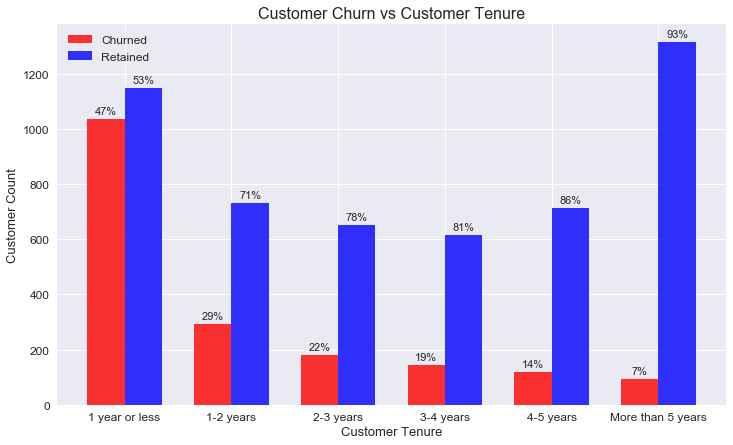

In [105]:
customer_stats = customer_data_trans[['Churn', 'tenure']].copy()

def tenure_to_years(tenure):
    
    if tenure <= 1 * 12:
        return '1 year or less'
    elif tenure <= 2 * 12:
        return '1-2 years'
    elif tenure <= 3 * 12:
        return '2-3 years'
    elif tenure <= 4 * 12:
        return '3-4 years'
    elif tenure <= 5 * 12:
        return '4-5 years'
    else:
        return 'More than 5 years'

customer_stats['tenure'] = customer_stats['tenure'].apply(lambda x: tenure_to_years(x))

def plot_stats(stats_list):
    
    churn_count = customer_stats.copy().groupby(stats_list[0]).sum()
    total_count = customer_stats.copy().groupby(stats_list[0]).count()
    non_churn_count = total_count - churn_count

    fig, ax = plt.subplots(figsize= (12, 7))
    width = 0.35

    x_axis = np.arange(len(churn_count.index))
    x_labels = list(churn_count.index)
    x_val_1 = churn_count['Churn']
    x_val_2 = non_churn_count['Churn']
    bar_label_1 = 'Churned'
    bar_label_2 = 'Retained'

    churn_bar = ax.bar(x_axis - width/2, x_val_1, width= width, label= bar_label_1, color= 'red', alpha= 0.8)
    non_churn_bar = ax.bar(x_axis + width/2, x_val_2, width= width, label= bar_label_2, color= 'blue', alpha= 0.8)

    def bar_label(c_bars_1, c_bars_2):

        for bar_1, bar_2 in zip(c_bars_1, c_bars_2):

            height_1 = bar_1.get_height()
            height_2 = bar_2.get_height()
            fract_1 = height_1 / (height_1 + height_2)
            fract_2 = height_2 / (height_1 + height_2)

            ax.annotate('{:.0%}'.format(fract_1),
                        xy=(bar_1.get_x() + bar_1.get_width() / 2, height_1),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', size= 11)

            ax.annotate('{:.0%}'.format(fract_2),
                        xy=(bar_2.get_x() + bar_2.get_width() / 2, height_2),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', size= 11)

    bar_label(churn_bar, non_churn_bar)

    ax.set_title(stats_list[1], size= 16)
    ax.legend()
    ax.set_xticks(x_axis)
    ax.set_xticklabels(x_labels)
    ax.set_xlabel(stats_list[2], size= 13)
    ax.set_ylabel('Customer Count', size= 13)
    plt.show()

stats_list = ['tenure', 'Customer Churn vs Customer Tenure', 'Customer Tenure']
plot_stats(stats_list)

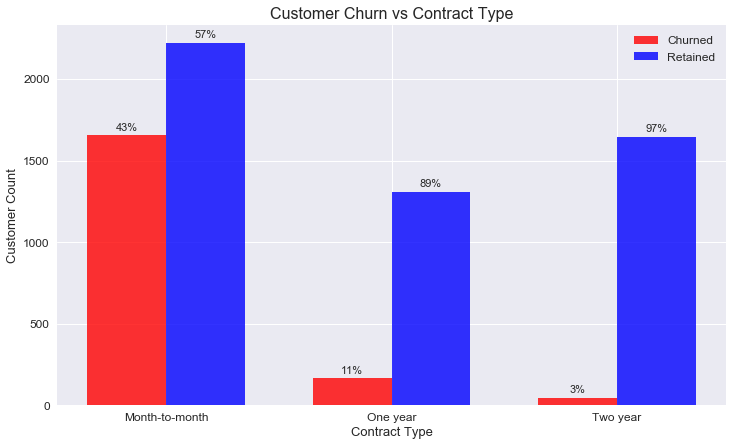

In [106]:
stats_list = ['Contract', 'Customer Churn vs Contract Type', 'Contract Type']
customer_stats = customer_data_bin[['Churn', stats_list[0]]].copy()

plot_stats(stats_list)

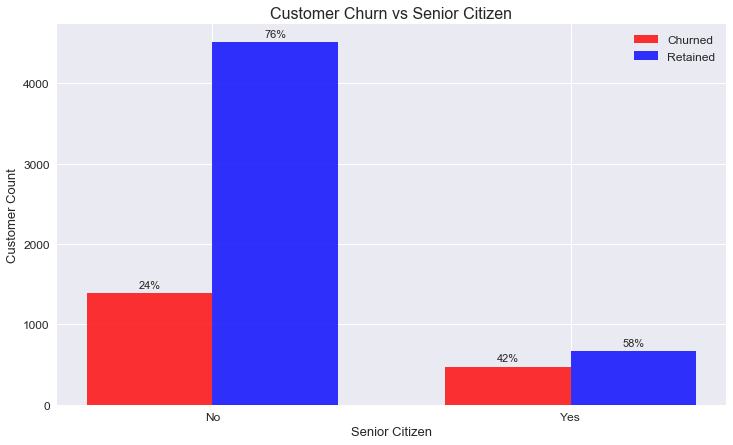

In [107]:
stats_list = ['SeniorCitizen', 'Customer Churn vs Senior Citizen', 'Senior Citizen']
customer_stats = customer_data_bin[['Churn', stats_list[0]]].copy()

plot_stats(stats_list)

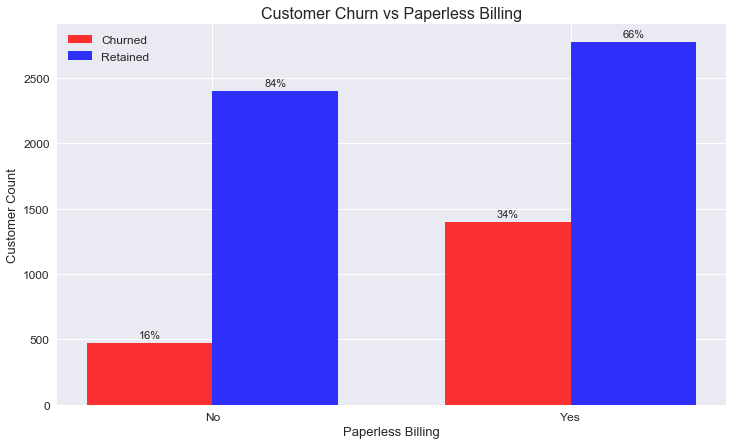

In [108]:
stats_list = ['PaperlessBilling', 'Customer Churn vs Paperless Billing', 'Paperless Billing']
customer_stats = customer_data_bin[['Churn', stats_list[0]]].copy()

plot_stats(stats_list)

In [ ]:
stats_list = ['MonthlyCharges', 'Customer Churn vs Monthly Charges', 'Monthly Charges']
customer_stats = customer_data_bin[['Churn', stats_list[0]]].copy()

def month_charge_categ(tenure):


customer_stats[stats_list[0]] = customer_stats[stats_list[0]].apply(lambda x: tenure_to_years(x))

plot_stats(stats_list)